In [1]:
import json
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels
import csv
import pickle

# Processing Data from PostGRES Output

Creating a single JSON file for each participant from PostGRES data that contains a single list of all participant data

In [2]:
fileprefix = "pilot_1" # pilot_[1,2,4]
filepath = '../results/{}_results.json'.format(fileprefix)


In [3]:
with open(filepath, 'r') as f:
    all_data = json.load(f)

In [4]:
part_data = {}

count = 0
for participant in all_data['values']:
    count+=1
    print(count, participant[2])
    try:
        part_object = json.loads(participant[17])
        part_object["Beginhit"] = participant[11]
        part_object["Beginexp"] = participant[12]
        part_object["Endhit"] = participant[13]
        part_object["psiturkStatus"] = participant[15]
        part_object["browser"] = participant[5]
        part_object["platform"] = participant[6]
        part_object["language"] = participant[7]
        
        if part_object["workerId"].startswith("debug"):
            continue

        part_data[part_object["workerId"]] = part_object
        with open('../results/{}_{}.json'.format(fileprefix, part_object['workerId']), 'w') as fw:
            json.dump(part_object, fw)
    except:
        print("Fail")
        continue;

1 615dfa409d28374d872b9fe5
Fail
2 614f95feabe63726446f5a11
3 9O66p82A8157x13347k2p5aK
Fail
4 611ceaa4d48088cf9fda1dbc
5 61218c57271f358adbe515f6
6 5de42a01a7cb2401ccc682c3
7 6137664fb23c5175515fa573
8 642ae4eca2d520f04e4e5082
9 611e58f3b7cfe10fe9eef3df
10 6152bfcde12c62b8971debb7
11 5c8fcb13dd3b360015b4dff6
12 6175f1328961735fa4d60fb8
13 5e6a9da6d4948e05714f4ee2
14 5ffdc5b4f80ddc375d96e429
15 5e738761c4c4982e6cb81e32
16 5f512f610a752a32cf96d74f
17 926Yp8248157313rC74W75a2
Fail
18 5d7374d36e3615001782c974
19 60daf06339acacceef1a00932
20 613fa3f65984b16169ccb151
21 5f943910155da1223d506645
22 602fb33786b077cdbad2d5bb
23 60daf06339acacceadf1a00932
24 6150726c26e31056e4513722
25 60daf06339acaccef1a00932
26 6059b5cb3e0d7d6ea4968474
27 63b6e8f0a0cb6c479197d96f
28 5fa9a4789785cb1d1735dba4
29 607cb0949256738dd89e89d9
30 5f19a15b6472d70008a9d5fe
31 5f0f05531efc4902d1aeb35b
32 5e9b449054b6d8046df16e44
33 6110925de98d2220c0b23bab
34 5fddb46833528a49580c72fe
35 5e9b0ac83abad80009e61116
36 60de16b5

In [5]:
part_data.keys()


dict_keys(['614f95feabe63726446f5a11', '611ceaa4d48088cf9fda1dbc', '61218c57271f358adbe515f6', '5de42a01a7cb2401ccc682c3', '6137664fb23c5175515fa573', '642ae4eca2d520f04e4e5082', '611e58f3b7cfe10fe9eef3df', '6152bfcde12c62b8971debb7', '5c8fcb13dd3b360015b4dff6', '6175f1328961735fa4d60fb8', '5e6a9da6d4948e05714f4ee2', '5ffdc5b4f80ddc375d96e429', '5e738761c4c4982e6cb81e32', '5f512f610a752a32cf96d74f', '5d7374d36e3615001782c974', '60daf06339acacceef1a00932', '613fa3f65984b16169ccb151', '5f943910155da1223d506645', '602fb33786b077cdbad2d5bb', '60daf06339acacceadf1a00932', '6150726c26e31056e4513722', '60daf06339acaccef1a00932', '6059b5cb3e0d7d6ea4968474', '63b6e8f0a0cb6c479197d96f', '5fa9a4789785cb1d1735dba4', '607cb0949256738dd89e89d9', '5f19a15b6472d70008a9d5fe', '5f0f05531efc4902d1aeb35b', '5e9b449054b6d8046df16e44', '6110925de98d2220c0b23bab', '5fddb46833528a49580c72fe', '5e9b0ac83abad80009e61116', '60de16b5b8d11b9990aec16e', '614991f899042a3e2582a626', '5c460648016e2f00017e7e56', '5fa18

# Reading Data from Already Created Participant Data Files

In [6]:
fileprefix = "pilot_1" # pilot_#, final
datafolder = '../results/'

all_part_files = [filename for filename in os.listdir(datafolder) if filename.startswith(fileprefix) and 'results' not in filename]
all_part_paths = [datafolder + filename for filename in all_part_files]

In [7]:
part_data = {}
for file in all_part_paths:
    with open(file, 'r') as f:
        participant = json.load(f)
        part_data[participant["workerId"]] = participant



In [8]:
len(part_data.keys())

74

# Analyzing Trial Data

Create a list of objects, one for each participant's data

In [9]:
part_stats_dicts = []
for participant in part_data.values():
    try:
        beginhit = datetime.datetime.strptime(participant['Beginhit'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        beginhit = None
    try:
        endhit = datetime.datetime.strptime(participant['Endhit'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        endhit = None
    try:    
        beginexp = datetime.datetime.strptime(participant['Beginexp'], '%Y-%m-%d %H:%M:%S.%f')
    except TypeError:
        beginexp = None
    
    try:
        hitLength = (endhit-beginhit).seconds
    except TypeError:
        hitLength = None
    
    try:
        expLength = (endhit-beginexp).seconds
    except TypeError:
        expLength = None
        
    numPracTrials = 0
    trialLengths = []
    trialScores = []
    rewardsWithheld = []
    effort = "-1"
    age = None
    gender = None
    colorblind = None
    print(participant['workerId'])
    try:
        firstTrialStamp = participant['data'][0]['dateTime']
        lastTrialStamp = participant['data'][-1]['dateTime']
    except:
        print("No data")
        continue
    if hitLength is None:
        hitLength = (lastTrialStamp - firstTrialStamp) / 1000
    if expLength is None:
        expLength = (lastTrialStamp - firstTrialStamp) / 1000
        
    mdp_timestamps = {
        "start" : 0,
        "end" : 0,
        "done": False
    }
    current_state = "stroop_1"
    last_trial = participant['data'][0]
    finishHITReached = False
    demographicsAvailable = False
    feedback = ""
    alreadyParticipated = ""
    comments = ""
    whatStrategy = ""
    strategyImprove = ""
    difficult = ""
    num_correct_sequences = 0
    final_quiz_responses = None
    for idx, trial in enumerate(participant['data']):
        trial_type = trial['trialdata']['trial_type']
        try:
            trial_id = str(trial['trialdata']['trial_id'])
        except KeyError:
            trial_id = ""
        
        if participant['workerId'] == "5eb40f1f0d916d20d9db9144":
            print("{}\t{}\t{}".format(trial_type, trial_id, idx))
            
        if trial_id.startswith("mouselab_instructions_1") and not mdp_timestamps["done"]:
            mdp_timestamps["done"] = True
            mdp_timestamps["start"] = trial['dateTime']
        
        if "num_correct_sequences" in trial['trialdata']:
            num_correct_sequences = trial['trialdata']['num_correct_sequences']
        
        if trial_id.startswith("final_quiz"):
            mdp_timestamps["end"] = trial['dateTime']
            final_quiz_responses = trial['trialdata']['response']
                    
        if trial_type == 'mouselab-mdp':
            if trial_id.startswith('practice'):
                numPracTrials += 1
            else:
                trialLengths.append(trial['trialdata']['trialTime'])
                
                trialScores.append(trial['trialdata']['score'])
                rewardsWithheld.append(trial['trialdata']['withholdReward'])
        if trial_type == 'survey-html-form':
            
            if 'effort' in trial['trialdata']['response']:
                effort = trial['trialdata']['response']['effort']
                age = trial['trialdata']['response']['age']
                gender = trial['trialdata']['response']['gender']
                colorblind = trial['trialdata']['response']['colorblind']
                demographicsAvailable = True
        if trial_id.startswith("finish_fail"):
            feedback = trial['trialdata']['response']['Q0']
            age = trial['trialdata']['response']['Q1']
            gender = trial['trialdata']['response']['Q2']
            colorblind = trial['trialdata']['response']['Q3']
            comments = trial['trialdata']['response']['Q4']
            demographicsAvailable = True
        elif trial_type == 'survey-text':
            if trial_id.startswith("self_report"):
                whatStrategy = trial['trialdata']['response']['Q0']
                strategyImprove = trial['trialdata']['response']['Q1']
                difficult = trial['trialdata']['response']['Q2']
            elif not trial_id.startswith("answer"):
                #print(trial['trialdata'])
                feedback = trial['trialdata']['response']['Q0']
                alreadyParticipated = trial['trialdata']['response']['Q1']
                comments = trial['trialdata']['response']['Q2']
        
        if trial_type == 'html-button-response':
            if "Finish HIT" in trial['trialdata']['stimulus']:
                finishHITReached = True
        last_trial = trial

    dropoutPoint = None
    for obj, type_ in zip([mdp_timestamps], ["mdp"]):
        if obj["start"] > 0 and obj["end"] == 0:
            
            dropoutPoint = type_
            obj["end"] = lastTrialStamp
            
    if not dropoutPoint:
        if len(trialLengths) == 0:
            dropoutPoint = "beginning"
        elif not finishHITReached:
            dropoutPoint = "finishHIT"
            
    if dropoutPoint:
        print(participant['workerId'], dropoutPoint)
    part_stats_dict = {
        "workerId": participant['workerId'],
        "Beginhit": beginhit,
        "Endhit": endhit,
        "Beginexp": beginexp,
        "psiturkStatus" : participant["psiturkStatus"],
        "browser" : participant["browser"],
        "platform" : participant["platform"],
        "language" : participant["language"],
        "hitLength": hitLength,
        "expLength": expLength,
        "totalLengthSum": (lastTrialStamp - firstTrialStamp) / 1000,
        "numQuizAttempts": numPracTrials / 2,
        "trialLengths": trialLengths,
        "trialScores" : trialScores,
        "numTrialsCompleted": len(trialLengths),
        "rewardsWithheld": rewardsWithheld,
        "effort": effort,
        "age":age,
        "colorblind":colorblind,
        "gender":gender,
        "condition": participant['condition'],
        "mouselabLength" : (mdp_timestamps["end"] - mdp_timestamps["start"]) / 1000,
        "dropoutPoint" : dropoutPoint,
        "feedback": feedback,
        "alreadyParticipated": alreadyParticipated,
        "comments": comments,
        "finishHITReached": finishHITReached,
        "demographicsAvailable": demographicsAvailable,
        "whatStrategy": whatStrategy,
        "strategyImprove": strategyImprove,
        "difficult": difficult,
        "num_correct_sequences": num_correct_sequences,
        "final_quiz_responses": final_quiz_responses
    }
    if 'questiondata' in participant and 'final_score' in participant['questiondata']:
        part_stats_dict['finalScore'] = participant['questiondata']['final_score']
    else:
        part_stats_dict['finalScore'] = sum([score for (score, withheld) in zip(trialScores, rewardsWithheld) if not withheld])
    
    part_stats_dict["expLengthSum"] = part_stats_dict["mouselabLength"]
    part_stats_dict["expLengthDiff"] = part_stats_dict["expLengthSum"] - part_stats_dict["expLength"]
    if len(trialLengths) > 0:
        part_stats_dict["averageTrialLength"] = sum(trialLengths) / len(trialLengths)
        part_stats_dict["propWithheld"] = sum(rewardsWithheld) / len(rewardsWithheld)
        
    part_stats_dicts.append(part_stats_dict)
    

63b6e8f0a0cb6c479197d96f
No data
60daf06339acaccef1a00932
60daf06339acaccef1a00932 mdp
5ece064a75736a193990951a
5fa9a4789785cb1d1735dba4
6059b5cb3e0d7d6ea4968474
5f22f26341e9e8025879eda6
5f22f26341e9e8025879eda6 mdp
60de16b5b8d11b9990aec16e
60de16b5b8d11b9990aec16e mdp
609e0cbe70da2c9091ed69d5
5f0f05531efc4902d1aeb35b
6044ca22bc6235555362d5bb
60cef9c83282a01ae76ff4c2
614f95feabe63726446f5a11
614f95feabe63726446f5a11 mdp
609915b2c8800cad8080ef5d
609915b2c8800cad8080ef5d mdp
5fddb46833528a49580c72fe
611cccc7df12bfa05e6135e0
6165d04961f94aba783d4529
5c629b836e03a00001d47bdd
6110925de98d2220c0b23bab
5d21e78e5a2cea0016a843c4
61218c57271f358adbe515f6
61218c57271f358adbe515f6 mdp
60143a1a222eb43daf203877
5f16ccc87d339d0008e08016
5f16ccc87d339d0008e08016 beginning
60fedb794287b5df4b12ea97
60daf06339acacceadf1a00932
60daf06339acacceadf1a00932 mdp
5f512f610a752a32cf96d74f
5f512f610a752a32cf96d74f mdp
61530e178cfcfcbdf069a3aa
610510ea2417b82e9a9b546c
610510ea2417b82e9a9b546c mdp
5eb03bbe9d57e50ac

In [33]:
stats_df = pd.DataFrame(part_stats_dicts)
print(len(stats_df))
filter_cols = ["workerId", "Beginhit", "hitLength", "expLength", "condition", "numQuizAttempts", "numTrialsCompleted", "mouselabLength", "finalScore", "num_correct_sequences", "dropoutPoint", "finishHITReached", "psiturkStatus", "effort", "demographicsAvailable"]
stats_df[filter_cols]

53


,workerId,Beginhit,hitLength,expLength,condition,numQuizAttempts,numTrialsCompleted,mouselabLength,finalScore,num_correct_sequences,dropoutPoint,finishHITReached,psiturkStatus,effort,demographicsAvailable
0,60daf06339acaccef1a00932,2023-04-05 13:09:00.874070,116.237,116.237,0,2.0,3,94.865,66,0,mdp,False,6,-1,False
1,5ece064a75736a193990951a,2023-04-05 13:36:44.560791,1146.000,1026.000,0,1.0,40,655.680,1431,0,None,True,3,0,True
2,5fa9a4789785cb1d1735dba4,2023-04-05 13:38:29.557477,730.000,717.000,0,1.0,40,537.153,1116,0,None,True,3,0,True
3,6059b5cb3e0d7d6ea4968474,2023-04-05 13:39:26.109351,1172.000,1165.000,0,1.0,40,832.238,519,0,None,True,3,0,True
4,5f22f26341e9e8025879eda6,2023-04-05 13:38:08.073896,292.424,292.424,1,1.0,0,163.369,0,0,mdp,False,6,-1,False
5,60de16b5b8d11b9990aec16e,2023-04-05 13:35:54.496450,1336.897,1336.897,1,3.0,7,840.382,317,0,mdp,False,6,-1,False
6,609e0cbe70da2c9091ed69d5,2023-04-05 13:33:37.431137,1125.000,1114.000,0,2.0,40,814.015,-188,0,None,True,3,0,True
7,5f0f05531efc4902d1aeb35b,2023-04-05 13:40:16.274285,2563.000,2551.000,1,1.0,40,1928.482,1354,39,None,True,3,0,True
8,6044ca22bc6235555362d5bb,2023-04-05 13:35:59.181842,1935.000,1926.000,1,2.0,40,1617.409,1751,29,None,True,3,0,True
9,60cef9c83282a01ae76ff4c2,2023-04-05 13:37:34.811960,1867.000,1860.000,1,3.0,40,1623.478,1604,37,None,True,3,0,True


In [34]:
# Filter those who dropped out immediately

immediate_drops = stats_df.loc[(stats_df.dropoutPoint == "beginning")]
print(len(immediate_drops))
immediate_drops

1


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,whatStrategy,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
29,614991f899042a3e2582a626,2023-04-05 13:35:31.783006,NaT,2023-04-05 13:35:37.292471,6,chrome,windows,en-US,4.565,4.565,...,,,,0,None,0,0.0,-4.565,NaN,NaN


In [35]:
no_immediate_drops = stats_df.loc[(stats_df.dropoutPoint != "beginning")]
print(len(no_immediate_drops))
no_immediate_drops

52


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,whatStrategy,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
0,60daf06339acaccef1a00932,2023-04-05 13:09:00.874070,NaT,2023-04-05 13:09:06.520319,6,chrome,macos,en-US,116.237,116.237,...,,,,0,None,66,94.865,-21.372,9863.333333,0.0
1,5ece064a75736a193990951a,2023-04-05 13:36:44.560791,2023-04-05 13:55:51.004054,2023-04-05 13:38:44.061009,3,chrome,windows,pl-PL,1146.000,1026.000,...,check the edges,if there was a green 48 at the end there was n...,It wasn't difficult at all,0,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",1431,655.680,-370.320,11974.875000,0.0
2,5fa9a4789785cb1d1735dba4,2023-04-05 13:38:29.557477,2023-04-05 13:50:40.045699,2023-04-05 13:38:42.671862,3,firefox,windows,en-GB,730.000,717.000,...,I used the node detector to uncover +48 and th...,Yes. I stopped clicking on all the end nodes a...,I found it very easy to improve my performance...,0,"{'Q0': '$-48 to $48', 'Q1': '$-4 to $4', 'Q2':...",1116,537.153,-179.847,10901.050000,0.0
3,6059b5cb3e0d7d6ea4968474,2023-04-05 13:39:26.109351,2023-04-05 13:58:58.852327,2023-04-05 13:39:33.363021,3,chrome,windows,pt-PT,1172.000,1165.000,...,whenever the result was negative I tried to re...,I think no,Very difficult because it is only unpredictable,0,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",519,832.238,-332.762,16069.825000,0.0
4,5f22f26341e9e8025879eda6,2023-04-05 13:38:08.073896,NaT,2023-04-05 13:38:13.946254,6,chrome,windows,el-GR,292.424,292.424,...,,,,0,None,0,163.369,-129.055,NaN,NaN
5,60de16b5b8d11b9990aec16e,2023-04-05 13:35:54.496450,NaT,2023-04-05 13:36:03.643803,6,chrome,windows,ru-RU,1336.897,1336.897,...,,,,0,None,317,840.382,-496.515,12396.857143,0.0
6,609e0cbe70da2c9091ed69d5,2023-04-05 13:33:37.431137,2023-04-05 13:52:22.507810,2023-04-05 13:33:48.317804,3,chrome,windows,en-US,1125.000,1114.000,...,It seems as if one point that the opposite sid...,Not at all.,Very difficult. I couldn't find the pattern,0,"{'Q0': '$-4 to $4', 'Q1': '$-4 to $4', 'Q2': '...",-188,814.015,-299.985,13044.050000,0.0
7,5f0f05531efc4902d1aeb35b,2023-04-05 13:40:16.274285,2023-04-05 14:23:00.083061,2023-04-05 13:40:28.733145,3,chrome,windows,en-US,2563.000,2551.000,...,To click on the nodes to see their worth befor...,"Yes, i clicked on the nodes before deciding wh...",Having to memorize the sequence of numbers,39,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",1354,1928.482,-622.518,20656.325000,0.0
8,6044ca22bc6235555362d5bb,2023-04-05 13:35:59.181842,2023-04-05 14:08:14.995927,2023-04-05 13:36:08.985131,3,chrome,windows,en-GB,1935.000,1926.000,...,"say number sequence out loud repeatedly, then ...",mostly the same strategy,sometimes messed up number sequence,29,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",1751,1617.409,-308.591,13007.025000,0.0
9,60cef9c83282a01ae76ff4c2,2023-04-05 13:37:34.811960,2023-04-05 14:08:42.224135,2023-04-05 13:37:41.589692,3,chrome,windows,en-US,1867.000,1860.000,...,allways first clicked the outer boxes to check...,"not really, cause the outter boxes were the en...",the randomness of the values made the game dif...,37,"{'Q0': '$-4 to $4', 'Q1': '$-4 to $4', 'Q2': '...",1604,1623.478,-236.522,12172.175000,0.0


In [36]:
# Partial compensation rates

gbp_hourly = 7.20
secondly_rate = gbp_hourly / (3600)

In [37]:
# Early quitters - Psiturk status 6 or 2, and no quiz attempts completed

early_quitters = no_immediate_drops.loc[(no_immediate_drops.psiturkStatus == 6) & (no_immediate_drops.numQuizAttempts == 0)]
early_quitters.loc[:,'bonus'] = (early_quitters['mouselabLength']) * secondly_rate
print(len(early_quitters))

# Printing bonuses
for idx, row in early_quitters.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))
    
early_quitters

2
614f95feabe63726446f5a11, 0.00
5f512f610a752a32cf96d74f, 0.00


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_48043/2548788458.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  early_quitters.loc[:,'bonus'] = (early_quitters['mouselabLength']) * secondly_rate


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus
10,614f95feabe63726446f5a11,2023-04-05 13:34:12.663860,NaT,2023-04-05 13:34:28.186391,6,chrome,windows,en-US,258.144,258.144,...,,,0,None,0,0.0,-258.144,NaN,NaN,0.0
17,5f512f610a752a32cf96d74f,2023-04-05 14:01:23.499017,NaT,2023-04-05 14:01:38.471946,6,chrome,linux,en-US,374.502,374.502,...,,,0,None,0,0.0,-374.502,NaN,NaN,0.0


In [38]:
# Filtering those who failed the quiz more than 4 times

failed_quiz = no_immediate_drops.loc[(no_immediate_drops.numQuizAttempts > 0) & (no_immediate_drops.numTrialsCompleted == 0)]
failed_quiz.loc[:,'bonus'] = (failed_quiz['mouselabLength']) * secondly_rate
print(len(failed_quiz))

# Printing bonuses
for idx, row in failed_quiz.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))
failed_quiz

8
5f22f26341e9e8025879eda6, 0.33
609915b2c8800cad8080ef5d, 0.60
610510ea2417b82e9a9b546c, 0.73
5e6a9da6d4948e05714f4ee2, 0.85
611e58f3b7cfe10fe9eef3df, 1.96
5d7374d36e3615001782c974, 0.66
61067a63d25f89bc79dbd95d, 0.66
5f1db717e2aa497071780d33, 0.03


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_48043/3569009787.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_quiz.loc[:,'bonus'] = (failed_quiz['mouselabLength']) * secondly_rate


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus
4,5f22f26341e9e8025879eda6,2023-04-05 13:38:08.073896,NaT,2023-04-05 13:38:13.946254,6,chrome,windows,el-GR,292.424,292.424,...,,,0,None,0,163.369,-129.055,NaN,NaN,0.326738
11,609915b2c8800cad8080ef5d,2023-04-05 13:38:04.540701,NaT,2023-04-05 13:38:20.419436,6,chrome,macos,en-US,585.791,585.791,...,,,0,None,0,298.795,-286.996,NaN,NaN,0.597590
19,610510ea2417b82e9a9b546c,2023-04-05 13:38:25.065641,NaT,2023-04-05 13:38:32.666590,6,chrome,windows,en-US,547.711,547.711,...,,,0,None,0,363.691,-184.020,NaN,NaN,0.727382
26,5e6a9da6d4948e05714f4ee2,2023-04-05 13:48:34.066897,NaT,2023-04-05 13:48:41.637925,6,chrome,windows,pl-PL,529.961,529.961,...,,,0,None,0,426.899,-103.062,NaN,NaN,0.853798
37,611e58f3b7cfe10fe9eef3df,2023-04-05 13:53:42.830045,2023-04-05 14:15:14.876250,2023-04-05 13:53:52.486652,3,chrome,windows,en-US,1292.000,1282.000,...,,,0,None,0,980.391,-301.609,NaN,NaN,1.960782
39,5d7374d36e3615001782c974,2023-04-05 13:36:59.845857,NaT,2023-04-05 13:37:07.364062,6,chrome,windows,pt-PT,455.339,455.339,...,,,0,None,0,332.278,-123.061,NaN,NaN,0.664556
41,61067a63d25f89bc79dbd95d,2023-04-05 13:35:49.807559,2023-04-05 13:43:47.286913,2023-04-05 13:35:56.900793,3,chrome,macos,nl-NL,477.000,470.000,...,,,0,None,0,332.488,-137.512,NaN,NaN,0.664976
47,5f1db717e2aa497071780d33,2023-04-05 13:37:05.587373,NaT,2023-04-05 13:37:15.936990,6,chrome,macos,en-US,52.690,52.690,...,,,0,None,0,14.183,-38.507,NaN,NaN,0.028366


In [39]:
failed_quiz[["workerId","numQuizAttempts", "dropoutPoint", "numTrialsCompleted"]]

,workerId,numQuizAttempts,dropoutPoint,numTrialsCompleted
4,5f22f26341e9e8025879eda6,1.0,mdp,0
11,609915b2c8800cad8080ef5d,1.0,mdp,0
19,610510ea2417b82e9a9b546c,2.0,mdp,0
26,5e6a9da6d4948e05714f4ee2,2.0,mdp,0
37,611e58f3b7cfe10fe9eef3df,4.0,mdp,0
39,5d7374d36e3615001782c974,2.0,mdp,0
41,61067a63d25f89bc79dbd95d,4.0,mdp,0
47,5f1db717e2aa497071780d33,0.5,mdp,0


In [40]:
for idx, row in failed_quiz.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

5f22f26341e9e8025879eda6	1
609915b2c8800cad8080ef5d	1
610510ea2417b82e9a9b546c	1
5e6a9da6d4948e05714f4ee2	1
611e58f3b7cfe10fe9eef3df	1
5d7374d36e3615001782c974	0
61067a63d25f89bc79dbd95d	0
5f1db717e2aa497071780d33	1


In [41]:
eligible = no_immediate_drops.loc[(~no_immediate_drops['workerId'].isin(early_quitters.workerId)) & (~no_immediate_drops['workerId'].isin(failed_quiz.workerId))]
print(len(eligible))
eligible

42


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,whatStrategy,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
0,60daf06339acaccef1a00932,2023-04-05 13:09:00.874070,NaT,2023-04-05 13:09:06.520319,6,chrome,macos,en-US,116.237,116.237,...,,,,0,None,66,94.865,-21.372,9863.333333,0.0
1,5ece064a75736a193990951a,2023-04-05 13:36:44.560791,2023-04-05 13:55:51.004054,2023-04-05 13:38:44.061009,3,chrome,windows,pl-PL,1146.000,1026.000,...,check the edges,if there was a green 48 at the end there was n...,It wasn't difficult at all,0,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",1431,655.680,-370.320,11974.875000,0.0
2,5fa9a4789785cb1d1735dba4,2023-04-05 13:38:29.557477,2023-04-05 13:50:40.045699,2023-04-05 13:38:42.671862,3,firefox,windows,en-GB,730.000,717.000,...,I used the node detector to uncover +48 and th...,Yes. I stopped clicking on all the end nodes a...,I found it very easy to improve my performance...,0,"{'Q0': '$-48 to $48', 'Q1': '$-4 to $4', 'Q2':...",1116,537.153,-179.847,10901.050000,0.0
3,6059b5cb3e0d7d6ea4968474,2023-04-05 13:39:26.109351,2023-04-05 13:58:58.852327,2023-04-05 13:39:33.363021,3,chrome,windows,pt-PT,1172.000,1165.000,...,whenever the result was negative I tried to re...,I think no,Very difficult because it is only unpredictable,0,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",519,832.238,-332.762,16069.825000,0.0
5,60de16b5b8d11b9990aec16e,2023-04-05 13:35:54.496450,NaT,2023-04-05 13:36:03.643803,6,chrome,windows,ru-RU,1336.897,1336.897,...,,,,0,None,317,840.382,-496.515,12396.857143,0.0
6,609e0cbe70da2c9091ed69d5,2023-04-05 13:33:37.431137,2023-04-05 13:52:22.507810,2023-04-05 13:33:48.317804,3,chrome,windows,en-US,1125.000,1114.000,...,It seems as if one point that the opposite sid...,Not at all.,Very difficult. I couldn't find the pattern,0,"{'Q0': '$-4 to $4', 'Q1': '$-4 to $4', 'Q2': '...",-188,814.015,-299.985,13044.050000,0.0
7,5f0f05531efc4902d1aeb35b,2023-04-05 13:40:16.274285,2023-04-05 14:23:00.083061,2023-04-05 13:40:28.733145,3,chrome,windows,en-US,2563.000,2551.000,...,To click on the nodes to see their worth befor...,"Yes, i clicked on the nodes before deciding wh...",Having to memorize the sequence of numbers,39,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",1354,1928.482,-622.518,20656.325000,0.0
8,6044ca22bc6235555362d5bb,2023-04-05 13:35:59.181842,2023-04-05 14:08:14.995927,2023-04-05 13:36:08.985131,3,chrome,windows,en-GB,1935.000,1926.000,...,"say number sequence out loud repeatedly, then ...",mostly the same strategy,sometimes messed up number sequence,29,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",1751,1617.409,-308.591,13007.025000,0.0
9,60cef9c83282a01ae76ff4c2,2023-04-05 13:37:34.811960,2023-04-05 14:08:42.224135,2023-04-05 13:37:41.589692,3,chrome,windows,en-US,1867.000,1860.000,...,allways first clicked the outer boxes to check...,"not really, cause the outter boxes were the en...",the randomness of the values made the game dif...,37,"{'Q0': '$-4 to $4', 'Q1': '$-4 to $4', 'Q2': '...",1604,1623.478,-236.522,12172.175000,0.0
12,5fddb46833528a49580c72fe,2023-04-05 13:35:02.542236,2023-04-05 14:02:41.129099,2023-04-05 13:35:12.673780,3,firefox,linux,en-US,1658.000,1648.000,...,I started out by brute forcing the the entire ...,"In the end, I realised that the nodes further ...","It wasn't that difficult, the only real proble...",18,"{'Q0': '$-8 to $8', 'Q1': '$-8 to $8', 'Q2': '...",1496,1211.988,-436.012,11208.450000,0.0


In [42]:
data_actually_complete = []

In [43]:
incomplete_data = eligible.loc[(eligible.psiturkStatus != 3) & (~eligible.workerId.isin(data_actually_complete))]
print(len(incomplete_data))
incomplete_data[["workerId", "numTrialsCompleted", "dropoutPoint"]]

5


,workerId,numTrialsCompleted,dropoutPoint
0,60daf06339acaccef1a00932,3,mdp
5,60de16b5b8d11b9990aec16e,7,mdp
14,61218c57271f358adbe515f6,4,mdp
16,60daf06339acacceadf1a00932,4,mdp
43,60daf06339acacceef1a00932,1,mdp


In [44]:
for idx, row in incomplete_data.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

60daf06339acaccef1a00932	0
60de16b5b8d11b9990aec16e	1
61218c57271f358adbe515f6	1
60daf06339acacceadf1a00932	1
60daf06339acacceef1a00932	1


In [45]:
data_actually_complete = []

incomplete_full_compensation_eligible = []
incomplete_partial_compensation_eligible = [
    "60de16b5b8d11b9990aec16e",
    "61218c57271f358adbe515f6",
]


In [46]:
incomplete_partial = eligible.loc[(eligible.workerId.isin(incomplete_partial_compensation_eligible))]
incomplete_partial.loc[:,'bonus'] = (incomplete_partial['mouselabLength']) * secondly_rate
print(len(incomplete_partial))

# Printing bonuses
for idx, row in incomplete_partial.iterrows():
    print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))
incomplete_partial

2
60de16b5b8d11b9990aec16e, 1.68
61218c57271f358adbe515f6, 1.39


/var/folders/8k/zq6x09px4838xflgn88yhgdw0002cw/T/ipykernel_48043/4059827684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomplete_partial.loc[:,'bonus'] = (incomplete_partial['mouselabLength']) * secondly_rate


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus
5,60de16b5b8d11b9990aec16e,2023-04-05 13:35:54.496450,NaT,2023-04-05 13:36:03.643803,6,chrome,windows,ru-RU,1336.897,1336.897,...,,,0,None,317,840.382,-496.515,12396.857143,0.0,1.680764
14,61218c57271f358adbe515f6,2023-04-05 14:19:02.902672,NaT,2023-04-05 14:19:34.053064,2,chrome,windows,en-ZA,842.902,842.902,...,,,0,None,77,694.097,-148.805,15999.250000,0.0,1.388194


In [47]:
# Participant data that is complete

complete_data = eligible.loc[(eligible.psiturkStatus == 3) | (eligible.workerId.isin(data_actually_complete))]
print(len(complete_data.loc[complete_data.condition == 0]))
print(len(complete_data.loc[complete_data.condition == 1]))
complete_data

20
17


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,whatStrategy,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
1,5ece064a75736a193990951a,2023-04-05 13:36:44.560791,2023-04-05 13:55:51.004054,2023-04-05 13:38:44.061009,3,chrome,windows,pl-PL,1146.0,1026.0,...,check the edges,if there was a green 48 at the end there was n...,It wasn't difficult at all,0,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",1431,655.680,-370.320,11974.875,0.0
2,5fa9a4789785cb1d1735dba4,2023-04-05 13:38:29.557477,2023-04-05 13:50:40.045699,2023-04-05 13:38:42.671862,3,firefox,windows,en-GB,730.0,717.0,...,I used the node detector to uncover +48 and th...,Yes. I stopped clicking on all the end nodes a...,I found it very easy to improve my performance...,0,"{'Q0': '$-48 to $48', 'Q1': '$-4 to $4', 'Q2':...",1116,537.153,-179.847,10901.050,0.0
3,6059b5cb3e0d7d6ea4968474,2023-04-05 13:39:26.109351,2023-04-05 13:58:58.852327,2023-04-05 13:39:33.363021,3,chrome,windows,pt-PT,1172.0,1165.0,...,whenever the result was negative I tried to re...,I think no,Very difficult because it is only unpredictable,0,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",519,832.238,-332.762,16069.825,0.0
6,609e0cbe70da2c9091ed69d5,2023-04-05 13:33:37.431137,2023-04-05 13:52:22.507810,2023-04-05 13:33:48.317804,3,chrome,windows,en-US,1125.0,1114.0,...,It seems as if one point that the opposite sid...,Not at all.,Very difficult. I couldn't find the pattern,0,"{'Q0': '$-4 to $4', 'Q1': '$-4 to $4', 'Q2': '...",-188,814.015,-299.985,13044.050,0.0
7,5f0f05531efc4902d1aeb35b,2023-04-05 13:40:16.274285,2023-04-05 14:23:00.083061,2023-04-05 13:40:28.733145,3,chrome,windows,en-US,2563.0,2551.0,...,To click on the nodes to see their worth befor...,"Yes, i clicked on the nodes before deciding wh...",Having to memorize the sequence of numbers,39,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",1354,1928.482,-622.518,20656.325,0.0
8,6044ca22bc6235555362d5bb,2023-04-05 13:35:59.181842,2023-04-05 14:08:14.995927,2023-04-05 13:36:08.985131,3,chrome,windows,en-GB,1935.0,1926.0,...,"say number sequence out loud repeatedly, then ...",mostly the same strategy,sometimes messed up number sequence,29,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",1751,1617.409,-308.591,13007.025,0.0
9,60cef9c83282a01ae76ff4c2,2023-04-05 13:37:34.811960,2023-04-05 14:08:42.224135,2023-04-05 13:37:41.589692,3,chrome,windows,en-US,1867.0,1860.0,...,allways first clicked the outer boxes to check...,"not really, cause the outter boxes were the en...",the randomness of the values made the game dif...,37,"{'Q0': '$-4 to $4', 'Q1': '$-4 to $4', 'Q2': '...",1604,1623.478,-236.522,12172.175,0.0
12,5fddb46833528a49580c72fe,2023-04-05 13:35:02.542236,2023-04-05 14:02:41.129099,2023-04-05 13:35:12.673780,3,firefox,linux,en-US,1658.0,1648.0,...,I started out by brute forcing the the entire ...,"In the end, I realised that the nodes further ...","It wasn't that difficult, the only real proble...",18,"{'Q0': '$-8 to $8', 'Q1': '$-8 to $8', 'Q2': '...",1496,1211.988,-436.012,11208.450,0.0
13,6110925de98d2220c0b23bab,2023-04-05 13:35:02.868016,2023-04-05 13:47:55.158955,2023-04-05 13:35:09.426092,3,chrome,windows,es-ES,772.0,765.0,...,To click on the first one and if it was green ...,"yes, i started using less help.",not difficult at all,0,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",845,587.403,-177.597,12128.150,0.0
15,60fedb794287b5df4b12ea97,2023-04-05 13:38:12.798978,2023-04-05 14:05:31.205949,2023-04-05 13:38:21.235765,3,chrome,windows,en-ZA,1638.0,1629.0,...,I had assumed that the spider had moved in a d...,No I could not improve my strategy.,The spider was not in a specific pattern round...,39,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",300,1313.190,-315.810,11840.625,0.0


In [48]:
for idx, row in complete_data.iterrows():
    print("{}\t{}".format(row['workerId'], row['condition']))

5ece064a75736a193990951a	0
5fa9a4789785cb1d1735dba4	0
6059b5cb3e0d7d6ea4968474	0
609e0cbe70da2c9091ed69d5	0
5f0f05531efc4902d1aeb35b	1
6044ca22bc6235555362d5bb	1
60cef9c83282a01ae76ff4c2	1
5fddb46833528a49580c72fe	1
6110925de98d2220c0b23bab	0
60fedb794287b5df4b12ea97	1
61530e178cfcfcbdf069a3aa	1
5eb03bbe9d57e50aca80dd11	0
5de42a01a7cb2401ccc682c3	1
5f943910155da1223d506645	0
613fa3f65984b16169ccb151	1
6152bfcde12c62b8971debb7	0
616be9cb53a01ac9797b574b	0
6175f1328961735fa4d60fb8	1
5e738761c4c4982e6cb81e32	1
5fa18c4a48882016b4b143f7	0
5dc8b885902a98623358a8ef	0
5e9b0ac83abad80009e61116	0
642ae4eca2d520f04e4e5082	0
5fa9628fcfe3fe0d2fd65062	1
5fed0b9ae9df3d74c5c0f14b	0
5c636850bad3560001c2749e	0
5ffdc5b4f80ddc375d96e429	1
5c460648016e2f00017e7e56	1
607cb0949256738dd89e89d9	1
611ceaa4d48088cf9fda1dbc	0
6150726c26e31056e4513722	0
602fb33786b077cdbad2d5bb	1
6137664fb23c5175515fa573	1
5c8fcb13dd3b360015b4dff6	0
5d3f34ea8d82dd0001e04247	0
5f19a15b6472d70008a9d5fe	0
5e9b449054b6d8046df16e44	1


In [49]:
# Participants eligible for full bonus

full_bonus_eligible = pd.concat([complete_data, eligible.loc[eligible.workerId.isin(incomplete_full_compensation_eligible)]])

print(len(full_bonus_eligible))
full_bonus_eligible

37


,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,whatStrategy,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld
1,5ece064a75736a193990951a,2023-04-05 13:36:44.560791,2023-04-05 13:55:51.004054,2023-04-05 13:38:44.061009,3,chrome,windows,pl-PL,1146.0,1026.0,...,check the edges,if there was a green 48 at the end there was n...,It wasn't difficult at all,0,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",1431,655.680,-370.320,11974.875,0.0
2,5fa9a4789785cb1d1735dba4,2023-04-05 13:38:29.557477,2023-04-05 13:50:40.045699,2023-04-05 13:38:42.671862,3,firefox,windows,en-GB,730.0,717.0,...,I used the node detector to uncover +48 and th...,Yes. I stopped clicking on all the end nodes a...,I found it very easy to improve my performance...,0,"{'Q0': '$-48 to $48', 'Q1': '$-4 to $4', 'Q2':...",1116,537.153,-179.847,10901.050,0.0
3,6059b5cb3e0d7d6ea4968474,2023-04-05 13:39:26.109351,2023-04-05 13:58:58.852327,2023-04-05 13:39:33.363021,3,chrome,windows,pt-PT,1172.0,1165.0,...,whenever the result was negative I tried to re...,I think no,Very difficult because it is only unpredictable,0,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",519,832.238,-332.762,16069.825,0.0
6,609e0cbe70da2c9091ed69d5,2023-04-05 13:33:37.431137,2023-04-05 13:52:22.507810,2023-04-05 13:33:48.317804,3,chrome,windows,en-US,1125.0,1114.0,...,It seems as if one point that the opposite sid...,Not at all.,Very difficult. I couldn't find the pattern,0,"{'Q0': '$-4 to $4', 'Q1': '$-4 to $4', 'Q2': '...",-188,814.015,-299.985,13044.050,0.0
7,5f0f05531efc4902d1aeb35b,2023-04-05 13:40:16.274285,2023-04-05 14:23:00.083061,2023-04-05 13:40:28.733145,3,chrome,windows,en-US,2563.0,2551.0,...,To click on the nodes to see their worth befor...,"Yes, i clicked on the nodes before deciding wh...",Having to memorize the sequence of numbers,39,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",1354,1928.482,-622.518,20656.325,0.0
8,6044ca22bc6235555362d5bb,2023-04-05 13:35:59.181842,2023-04-05 14:08:14.995927,2023-04-05 13:36:08.985131,3,chrome,windows,en-GB,1935.0,1926.0,...,"say number sequence out loud repeatedly, then ...",mostly the same strategy,sometimes messed up number sequence,29,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",1751,1617.409,-308.591,13007.025,0.0
9,60cef9c83282a01ae76ff4c2,2023-04-05 13:37:34.811960,2023-04-05 14:08:42.224135,2023-04-05 13:37:41.589692,3,chrome,windows,en-US,1867.0,1860.0,...,allways first clicked the outer boxes to check...,"not really, cause the outter boxes were the en...",the randomness of the values made the game dif...,37,"{'Q0': '$-4 to $4', 'Q1': '$-4 to $4', 'Q2': '...",1604,1623.478,-236.522,12172.175,0.0
12,5fddb46833528a49580c72fe,2023-04-05 13:35:02.542236,2023-04-05 14:02:41.129099,2023-04-05 13:35:12.673780,3,firefox,linux,en-US,1658.0,1648.0,...,I started out by brute forcing the the entire ...,"In the end, I realised that the nodes further ...","It wasn't that difficult, the only real proble...",18,"{'Q0': '$-8 to $8', 'Q1': '$-8 to $8', 'Q2': '...",1496,1211.988,-436.012,11208.450,0.0
13,6110925de98d2220c0b23bab,2023-04-05 13:35:02.868016,2023-04-05 13:47:55.158955,2023-04-05 13:35:09.426092,3,chrome,windows,es-ES,772.0,765.0,...,To click on the first one and if it was green ...,"yes, i started using less help.",not difficult at all,0,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",845,587.403,-177.597,12128.150,0.0
15,60fedb794287b5df4b12ea97,2023-04-05 13:38:12.798978,2023-04-05 14:05:31.205949,2023-04-05 13:38:21.235765,3,chrome,windows,en-ZA,1638.0,1629.0,...,I had assumed that the spider had moved in a d...,No I could not improve my strategy.,The spider was not in a specific pattern round...,39,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",300,1313.190,-315.810,11840.625,0.0


In [50]:
# Calculating the bonus conversion rate for each condition

max_bonus = 1.5

bonus_calc_cols = ["condition", "finalScore"]

bonus_rate = {}

for condition in np.unique(full_bonus_eligible.condition):
    bonus_rate[condition] = max_bonus / full_bonus_eligible.loc[full_bonus_eligible.condition == condition].finalScore.max()

# stats_df_filtered = stats_df.loc[stats_df['numTrialsCompleted'] > 0]

bonuses = []
# Adding the bonus for each participant
for idx, row in full_bonus_eligible.iterrows():
    bonuses.append(bonus_rate[row['condition']] * row['finalScore'])

full_bonus_eligible['bonus'] = bonuses
full_bonus_eligible

,workerId,Beginhit,Endhit,Beginexp,psiturkStatus,browser,platform,language,hitLength,expLength,...,strategyImprove,difficult,num_correct_sequences,final_quiz_responses,finalScore,expLengthSum,expLengthDiff,averageTrialLength,propWithheld,bonus
1,5ece064a75736a193990951a,2023-04-05 13:36:44.560791,2023-04-05 13:55:51.004054,2023-04-05 13:38:44.061009,3,chrome,windows,pl-PL,1146.0,1026.0,...,if there was a green 48 at the end there was n...,It wasn't difficult at all,0,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",1431,655.680,-370.320,11974.875,0.0,1.398371
2,5fa9a4789785cb1d1735dba4,2023-04-05 13:38:29.557477,2023-04-05 13:50:40.045699,2023-04-05 13:38:42.671862,3,firefox,windows,en-GB,730.0,717.0,...,Yes. I stopped clicking on all the end nodes a...,I found it very easy to improve my performance...,0,"{'Q0': '$-48 to $48', 'Q1': '$-4 to $4', 'Q2':...",1116,537.153,-179.847,10901.050,0.0,1.090554
3,6059b5cb3e0d7d6ea4968474,2023-04-05 13:39:26.109351,2023-04-05 13:58:58.852327,2023-04-05 13:39:33.363021,3,chrome,windows,pt-PT,1172.0,1165.0,...,I think no,Very difficult because it is only unpredictable,0,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",519,832.238,-332.762,16069.825,0.0,0.507166
6,609e0cbe70da2c9091ed69d5,2023-04-05 13:33:37.431137,2023-04-05 13:52:22.507810,2023-04-05 13:33:48.317804,3,chrome,windows,en-US,1125.0,1114.0,...,Not at all.,Very difficult. I couldn't find the pattern,0,"{'Q0': '$-4 to $4', 'Q1': '$-4 to $4', 'Q2': '...",-188,814.015,-299.985,13044.050,0.0,-0.183713
7,5f0f05531efc4902d1aeb35b,2023-04-05 13:40:16.274285,2023-04-05 14:23:00.083061,2023-04-05 13:40:28.733145,3,chrome,windows,en-US,2563.0,2551.0,...,"Yes, i clicked on the nodes before deciding wh...",Having to memorize the sequence of numbers,39,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",1354,1928.482,-622.518,20656.325,0.0,1.159909
8,6044ca22bc6235555362d5bb,2023-04-05 13:35:59.181842,2023-04-05 14:08:14.995927,2023-04-05 13:36:08.985131,3,chrome,windows,en-GB,1935.0,1926.0,...,mostly the same strategy,sometimes messed up number sequence,29,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",1751,1617.409,-308.591,13007.025,0.0,1.500000
9,60cef9c83282a01ae76ff4c2,2023-04-05 13:37:34.811960,2023-04-05 14:08:42.224135,2023-04-05 13:37:41.589692,3,chrome,windows,en-US,1867.0,1860.0,...,"not really, cause the outter boxes were the en...",the randomness of the values made the game dif...,37,"{'Q0': '$-4 to $4', 'Q1': '$-4 to $4', 'Q2': '...",1604,1623.478,-236.522,12172.175,0.0,1.374072
12,5fddb46833528a49580c72fe,2023-04-05 13:35:02.542236,2023-04-05 14:02:41.129099,2023-04-05 13:35:12.673780,3,firefox,linux,en-US,1658.0,1648.0,...,"In the end, I realised that the nodes further ...","It wasn't that difficult, the only real proble...",18,"{'Q0': '$-8 to $8', 'Q1': '$-8 to $8', 'Q2': '...",1496,1211.988,-436.012,11208.450,0.0,1.281553
13,6110925de98d2220c0b23bab,2023-04-05 13:35:02.868016,2023-04-05 13:47:55.158955,2023-04-05 13:35:09.426092,3,chrome,windows,es-ES,772.0,765.0,...,"yes, i started using less help.",not difficult at all,0,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",845,587.403,-177.597,12128.150,0.0,0.825733
15,60fedb794287b5df4b12ea97,2023-04-05 13:38:12.798978,2023-04-05 14:05:31.205949,2023-04-05 13:38:21.235765,3,chrome,windows,en-ZA,1638.0,1629.0,...,No I could not improve my strategy.,The spider was not in a specific pattern round...,39,"{'Q0': '$-4 to $4', 'Q1': '$-8 to $8', 'Q2': '...",300,1313.190,-315.810,11840.625,0.0,0.256996


In [51]:
full_bonus_eligible.loc[full_bonus_eligible.condition == 1]["num_correct_sequences"]

7     39
8     29
9     37
12    18
15    39
18    28
21    24
23    36
27    25
28    37
34    40
38    35
40    21
42    34
46    36
48    36
52    34
Name: num_correct_sequences, dtype: int64

In [29]:
# Printing bonuses

for idx, row in full_bonus_eligible.iterrows():
    if(row['bonus'] > 0):
        print('{0}, {1:0.2f}'.format(row['workerId'], row['bonus']))

5ece064a75736a193990951a, 1.40
5fa9a4789785cb1d1735dba4, 1.09
6059b5cb3e0d7d6ea4968474, 0.51
5f0f05531efc4902d1aeb35b, 1.16
6044ca22bc6235555362d5bb, 1.50
60cef9c83282a01ae76ff4c2, 1.37
5fddb46833528a49580c72fe, 1.28
6110925de98d2220c0b23bab, 0.83
60fedb794287b5df4b12ea97, 0.26
5eb03bbe9d57e50aca80dd11, 0.03
5de42a01a7cb2401ccc682c3, 1.42
5f943910155da1223d506645, 1.03
613fa3f65984b16169ccb151, 1.24
6152bfcde12c62b8971debb7, 1.28
616be9cb53a01ac9797b574b, 1.29
6175f1328961735fa4d60fb8, 1.26
5e738761c4c4982e6cb81e32, 1.25
5fa18c4a48882016b4b143f7, 1.07
5dc8b885902a98623358a8ef, 0.77
5e9b0ac83abad80009e61116, 1.44
642ae4eca2d520f04e4e5082, 1.39
5fed0b9ae9df3d74c5c0f14b, 1.33
5c636850bad3560001c2749e, 0.66
5ffdc5b4f80ddc375d96e429, 1.36
5c460648016e2f00017e7e56, 1.07
607cb0949256738dd89e89d9, 1.10
611ceaa4d48088cf9fda1dbc, 1.50
6150726c26e31056e4513722, 0.59
602fb33786b077cdbad2d5bb, 1.43
6137664fb23c5175515fa573, 0.17
5c8fcb13dd3b360015b4dff6, 1.38
5d3f34ea8d82dd0001e04247, 1.40
5f19a15b

In [30]:
# Average bonus

print(full_bonus_eligible["bonus"].mean())
print(full_bonus_eligible["bonus"].std())

0.9896015049868504
0.5132534616367768


# Creating CSV for MCL Toolbox

Converting participant data into a CSV format that is appropriate for reading by mcl_toolbox models

In [24]:
s = "pid,trial_index,action_time,actions,block,path,queries,reward,rt,condition,bonus,score,simulation_mode,state_rewards,time_elapsed,trialTime,trial_type"

for h in s.split(","):
    print("\"{}\",".format(h))

"pid",
"trial_index",
"action_time",
"actions",
"block",
"path",
"queries",
"reward",
"rt",
"condition",
"bonus",
"score",
"simulation_mode",
"state_rewards",
"time_elapsed",
"trialTime",
"trial_type",


In [25]:
header_row = [
    "pid",
    "trial_index",
    "action_time",
    "actions",
    "block",
    "path",
    "queries",
    "reward",
    "rt",
    "condition",
    "bonus",
    "score",
    "simulation_mode",
    "state_rewards",
    "time_elapsed",
    "trialTime",
    "trial_type",
    "reward_withheld"
]


In [2]:
scarce_complete = complete_data[complete_data.condition == 1]
control_complete = complete_data[complete_data.condition == 0]


control_csv_rows = [header_row]
scarce_csv_rows = [header_row]

# Create a CSV table with all the trials as rows
for workerId in complete_data.workerId:
    # Read data as was present in PostGRES output
    # Part_data object created at very beginning of this notebook
    participant = part_data[workerId]
    trial_count = 1
    click_cost = participant["condition"] * 0.25 + (1 - participant["condition"])
    for idx, data_point in enumerate(participant["data"]):
        trialdata = data_point["trialdata"]
        if trialdata["trial_type"] == "mouselab-mdp" and trialdata["trial_id"].startswith("mdp_"):
            num_clicks = len(trialdata["queries"]["click"]["state"]["target"])
            new_row = [
                workerId,
                trial_count,
                trialdata["actionTimes"],
                trialdata["actions"],
                "begin" if trial_count <= 10 else "test",
                trialdata["path"],
                trialdata["queries"],
                trialdata["rewards"],
                trialdata["rt"],
                participant["condition"],
                0,
                trialdata["score"],
                [None] * 3,
                trialdata["stateRewards"],
                trialdata["time_elapsed"],
                trialdata["trialTime"],
                trialdata["trial_type"],
                trialdata["withholdReward"]
            ]
            trial_count += 1
            # print(click_cost, num_clicks, trialdata["score"], new_row[11], new_row[-1])
            if participant["condition"] == 0:
                control_csv_rows.append(new_row)
            else:
                scarce_csv_rows.append(new_row)
    
    

NameError: name 'complete_data' is not defined

In [31]:
# Write to CSV file

with open('../results/mouselab-mdp-final-scarce.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in scarce_csv_rows:
        writer.writerow(row)


In [32]:
# Write to CSV file

with open('../results/mouselab-mdp-final-control.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in control_csv_rows:
        writer.writerow(row)


In [8]:
# Creating CSV for optimal strategy to infer sequences

optimalpicklename = "../results/1.0_clicks_high_increasing_.pickle"

with open(optimalpicklename, 'rb') as file:
    optimal_clicks = pickle.load(file)
    
opt_csv_rows = [header_row]

trial_count = 1

for trial in optimal_clicks["optimal"]:
    trial_rewards = [trial["stateRewards"][int(c)] for c in trial["clicks"][:-1]]
    new_row = [
        "dynamic_program",
        trial_count,
        [],
        [],
        "begin" if trial_count <= 10 else "test",
        [],
        { 
            "click" : { 
                "state" : {
                    "target" : trial["clicks"][:-1],
                    "times" : list(range(len(trial["clicks"][:-1])))
                }
            }
        },
        trial_rewards,
        [3] * len(trial["clicks"][:-1]),
        0,
        0,
        0,
        [None] * 3,
        trial["stateRewards"],
        None,
        None,
        "mouselab-mdp"

    ]
    trial_count += 1
    opt_csv_rows.append(new_row)
    if trial_count == 31: 
        break

In [9]:
# Write to CSV file

with open('../results/mouselab-mdp-final-dp.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for row in opt_csv_rows:
        writer.writerow(row)


## Feedback and Demographics

In [26]:
len(complete_data)

208

In [27]:
# Feedback comments

for part in part_stats_dicts:
    printed = False
    if len(part["feedback"]) > 0:
        print("Feedback: " + part["feedback"])
        printed = True
    if len(part["alreadyParticipated"]) > 0:
        print("Already participated: " + part["alreadyParticipated"])
        printed = True
    if len(part["comments"]) > 0:
        print("Comments: " + part["comments"])
        printed = True
    if printed:
        print("\n")

Feedback: No, it was simple
Already participated: No, it was a first
Comments: Interesting study


Already participated: no


Feedback: no
Already participated: no
Comments: no


Feedback: No
Already participated: No
Comments: N/A


Feedback: no
Already participated: no
Comments: no


Feedback: no but it did take me a while (maybe 30 webs) to realise that it was worth inspecting more than I had been given the low cost vs potential reward
Already participated: no this was my first .
Comments: I did not understand the relevance of the spider being forgetful 


Feedback: No
Already participated: No


Feedback: Nothing was confusing.
Already participated: Yes


Feedback: Not hard at all
Already participated: haven't completed
Comments: No


Feedback: No
Already participated: No
Comments: No


Already participated: No


Feedback: All were ok!
Already participated: I have not participated in any Web of Chash before.


Feedback: No
Already participated: No


Feedback: There were times when I 

In [28]:
# Demographics:

which_df = complete_data
scarce_df = which_df.loc[which_df.condition == 1]
control_df = which_df.loc[which_df.condition == 0]

ages = {
    "all" : which_df["age"].astype("int"),
    "control" : control_df["age"].astype("int"),
    "scarce" : scarce_df["age"].astype("int")
}

num_male = {
    
}
num_female = {
    
}
num_other = {
    
}
gender_unique, gender_counts = np.unique(which_df.gender, return_counts=True)
genders = np.asarray((gender_unique, gender_counts)).T
num_male["all"] = genders[np.where(genders[:,0] == "male")[0][0], 1]
num_female["all"] = genders[np.where(genders[:,0] == "female")[0][0], 1]
try:
    num_other["all"] = genders[np.where(genders[:,0] == "other")[0][0], 1]
except:
    num_other["all"] = 0

gender_unique, gender_counts = np.unique(scarce_df.gender, return_counts=True)
genders = np.asarray((gender_unique, gender_counts)).T
num_male["memory"] = genders[np.where(genders[:,0] == "male")[0][0], 1]
num_female["memory"] = genders[np.where(genders[:,0] == "female")[0][0], 1]
try:
    num_other["memory"] = genders[np.where(genders[:,0] == "other")[0][0], 1]
except:
    num_other["memory"] = 0

gender_unique, gender_counts = np.unique(control_df.gender, return_counts=True)
genders = np.asarray((gender_unique, gender_counts)).T
num_male["disappear"] = genders[np.where(genders[:,0] == "male")[0][0], 1]
num_female["disappear"] = genders[np.where(genders[:,0] == "female")[0][0], 1]
try:
    num_other["disappear"] = genders[np.where(genders[:,0] == "other")[0][0], 1]
except:
    num_other["disappear"] = 0

efforts = which_df["effort"].astype("int")
colorblind_unique, colorblind_counts = np.unique(which_df.colorblind, return_counts=True)
colorblinds = np.asarray((colorblind_unique, colorblind_counts)).T

print("Age stats:")
print("\tOverall:")
print("\t\tMean: {0:0.3f}".format(ages["all"].mean()))
print("\t\tSD: {0:0.3f}".format(ages["all"].std()))
print("\t\tMedian: {0:0.3f}".format(ages["all"].median()))
print("\t\tMax: {0:0.3f}".format(ages["all"].max()))
print("\t\tMin: {0:0.3f}".format(ages["all"].min()))
print("\tScarce:")
print("\t\tMean: {0:0.3f}".format(ages["scarce"].mean()))
print("\t\tSD: {0:0.3f}".format(ages["scarce"].std()))
print("\t\tMedian: {0:0.3f}".format(ages["scarce"].median()))
print("\tControl:")
print("\t\tMean: {0:0.3f}".format(ages["control"].mean()))
print("\t\tSD: {0:0.3f}".format(ages["control"].std()))
print("\t\tMedian: {0:0.3f}".format(ages["control"].median()))

print("Gender stats:")
print("\tOverall:")
print("\t\tMale: {0} ({1:0.2f}%)".format(num_male["all"], (100 * num_male["all"] / len(which_df))))
print("\t\tFemale: {0} ({1:0.2f}%)".format(num_female["all"], (100 * num_female["all"] / len(which_df))))
print("\t\tOther: {0} ({1:0.2f}%)".format(num_other["all"], (100 * num_other["all"] / len(which_df))))
print("\tScarce:")
print("\t\tMale: {0} ({1:0.2f}%)".format(num_male["memory"], (100 * num_male["memory"] / len(scarce_df))))
print("\t\tFemale: {0} ({1:0.2f}%)".format(num_female["memory"], (100 * num_female["memory"] / len(scarce_df))))
print("\t\tOther: {0} ({1:0.2f}%)".format(num_other["memory"], (100 * num_other["memory"] / len(scarce_df))))
print("\tControl:")
print("\t\tMale: {0} ({1:0.2f}%)".format(num_male["disappear"], (100 * num_male["disappear"] / len(control_df))))
print("\t\tFemale: {0} ({1:0.2f}%)".format(num_female["disappear"], (100 * num_female["disappear"] / len(control_df))))
print("\t\tOther: {0} ({1:0.2f}%)".format(num_other["disappear"], (100 * num_other["disappear"] / len(control_df))))

Age stats:
	Overall:
		Mean: 30.162
		SD: 9.665
		Median: 28.000
		Max: 61.000
		Min: 19.000
	Scarce:
		Mean: 30.353
		SD: 9.823
		Median: 27.000
	Control:
		Mean: 30.000
		SD: 9.782
		Median: 28.000
Gender stats:
	Overall:
		Male: 18 (48.65%)
		Female: 19 (51.35%)
		Other: 0 (0.00%)
	Scarce:
		Male: 9 (52.94%)
		Female: 8 (47.06%)
		Other: 0 (0.00%)
	Control:
		Male: 9 (45.00%)
		Female: 11 (55.00%)
		Other: 0 (0.00%)


In [38]:
# Comments on difficulty and strategy - condition 0

for part in part_stats_dicts:
    if part['condition'] != 0: continue
    printed = False
    if len(part["whatStrategy"]) > 0:
        print("Strategy Used: " + part["whatStrategy"])
        printed = True
    if len(part["strategyImprove"]) > 0:
        print("How strategy was improved: " + part["strategyImprove"])
        printed = True
    if len(part["difficult"]) > 0:
        print("Difficulty: " + part["difficult"])
        printed = True
    if printed:
        print("\n")

Strategy Used: check the edges
How strategy was improved: if there was a green 48 at the end there was no more sense to click on the middle
Difficulty: It wasn't difficult at all


Strategy Used: I used the node detector to uncover +48 and then started as soon as that appeared. Or 24 if there wasn't a 48.
How strategy was improved: Yes. I stopped clicking on all the end nodes and started to move as soon as I found a 48
Difficulty: I found it very easy to improve my performance by spending less on revealing nodes.


Strategy Used: whenever the result was negative I tried to repeat the same paths. If it was positive, I tried to go in the opposite direction. 
How strategy was improved: I think no
Difficulty: Very difficult because it is only unpredictable 


Strategy Used: It seems as if one point that the opposite sides held more value
How strategy was improved: Not at all.
Difficulty: Very difficult.  I couldn't find the pattern


Strategy Used: To click on the first one and if it was g

In [39]:
for part in part_stats_dicts:
    if part['condition'] != 1: continue
    printed = False
    if len(part["whatStrategy"]) > 0:
        print("Strategy Used: " + part["whatStrategy"])
        printed = True
    if len(part["strategyImprove"]) > 0:
        print("How strategy was improved: " + part["strategyImprove"])
        printed = True
    if len(part["difficult"]) > 0:
        print("Difficulty: " + part["difficult"])
        printed = True
    if printed:
        print("\n")

Strategy Used: To click on the nodes to see their worth before moving my arrow to any direction
How strategy was improved: Yes, i clicked on the nodes before deciding whether to move to that direction or not
Difficulty: Having to memorize the sequence of numbers


Strategy Used: say number sequence out loud repeatedly, then click on endpoint nodes for largest amount
How strategy was improved: mostly the same strategy
Difficulty: sometimes messed up number sequence


Strategy Used: allways first clicked the outer boxes to check the end result
How strategy was improved: not really, cause the outter boxes were the end result it was just to find the higher value ones
Difficulty: the randomness of the values made the game difficult+ the remembering the numbers at the end


Strategy Used: I started out by brute forcing the the entire field, checking for the best route.
How strategy was improved: In the end, I realised that the nodes further away have higher values, so I started checking the 

In [52]:
correct_answers = {
    "Q0": "$-4 to $4",
    "Q1": "$-8 to $8",
    "Q2": "$-48 to $48"
}

num_correct_s = []
bonus_s = []

num_correct_c = []
bonus_c = []

for idx, row in complete_data.loc[complete_data.condition == 1].iterrows():
    part = [p for p in part_stats_dicts if p["workerId"] == row["workerId"]][0]
    part_answers = part['final_quiz_responses']
    part_correct_answers = sum([part_answers[key] == correct_answers[key] for key in correct_answers.keys()])
    num_correct_s.append(part_correct_answers)
    part_bonus = full_bonus_eligible.loc[full_bonus_eligible.workerId == row["workerId"]].bonus.values[0]
    bonus_s.append(part_bonus)

for idx, row in complete_data.loc[complete_data.condition == 0].iterrows():
    part = [p for p in part_stats_dicts if p["workerId"] == row["workerId"]][0]
    part_answers = part['final_quiz_responses']
    part_correct_answers = sum([part_answers[key] == correct_answers[key] for key in correct_answers.keys()])
    num_correct_c.append(part_correct_answers)
    part_bonus = full_bonus_eligible.loc[full_bonus_eligible.workerId == row["workerId"]].bonus.values[0]
    bonus_c.append(part_bonus)


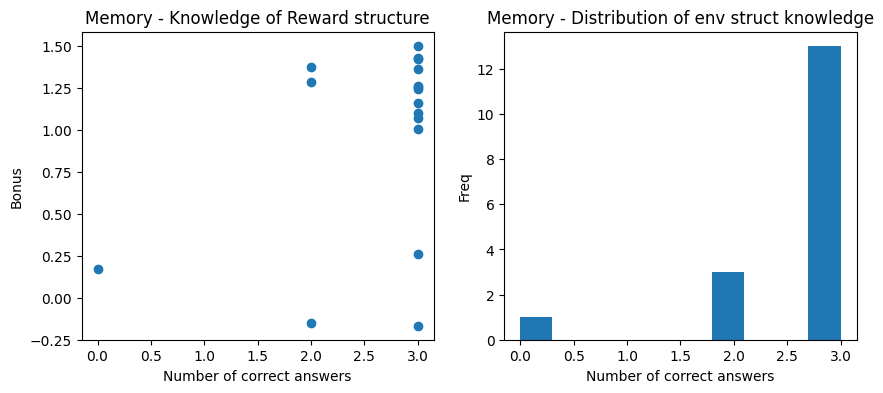

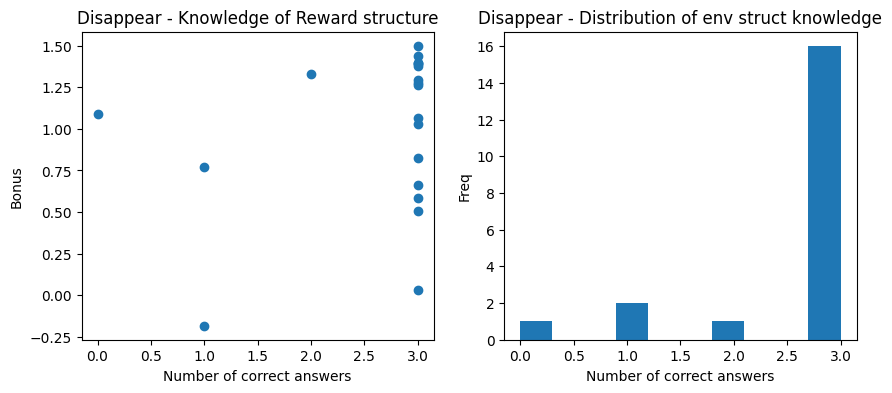

In [54]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(num_correct_s, bonus_s)
plt.xlabel("Number of correct answers")
plt.ylabel("Bonus")
plt.title("Memory - Knowledge of Reward structure")
plt.subplot(1,2,2)
plt.hist(num_correct_s)
plt.xlabel("Number of correct answers")
plt.ylabel("Freq")
plt.title("Memory - Distribution of env struct knowledge")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(num_correct_c, bonus_c)
plt.xlabel("Number of correct answers")
plt.ylabel("Bonus")
plt.title("Disappear - Knowledge of Reward structure")
plt.subplot(1,2,2)
plt.hist(num_correct_c)
plt.xlabel("Number of correct answers")
plt.ylabel("Freq")
plt.title("Disappear - Distribution of env struct knowledge")

plt.show()